In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import sklearn.tree 
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv("체질검사.csv")

In [3]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

In [4]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 1234)

In [5]:
print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}".format(df_test_y.shape))

Train data X size	: (176, 13)
Train data Y size	: (176,)
Test data X size	: (76, 13)
Test data Y size	: (76,)


In [6]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set:	1.000
Score on test set:	0.295


In [7]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [8]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range (1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [9]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


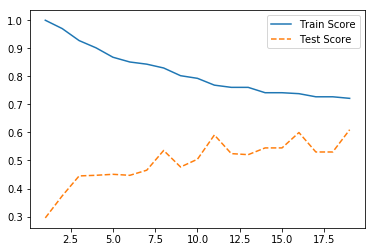

In [10]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [11]:
from sklearn.tree import export_graphviz

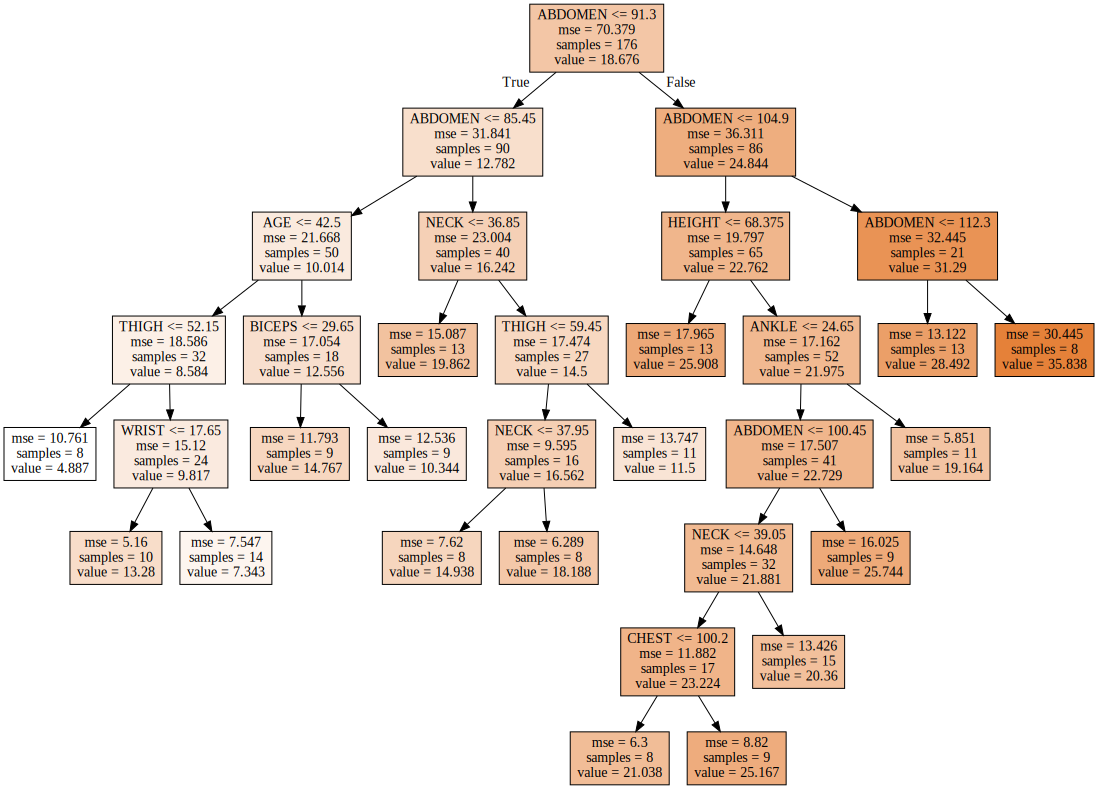

In [12]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)


with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

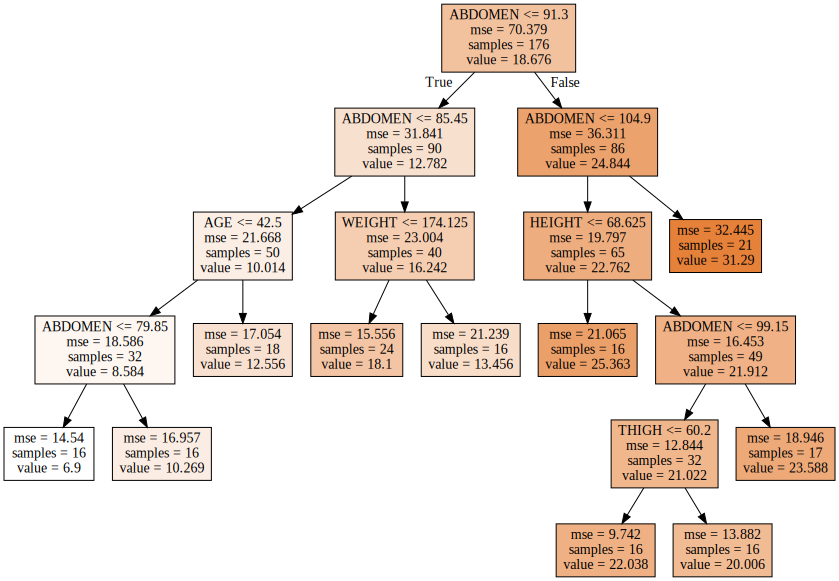

In [13]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)


with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [14]:
train_score = []; test_score = []
para_split = [n_leaf * 2 for n_leaf in range (2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


In [15]:
df_score_split_diff = pd.DataFrame()
df_score_split_diff["MinSamplesLeaf"] = para_split
df_score_split_diff["TrainScore"] = train_score
df_score_split_diff["TestScore"] = test_score
df_score_split_diff["Diff"] = df_score_split["TrainScore"]-df_score_split["TestScore"]

In [16]:
df_score_split_diff.sort_values("Diff").round(3)

,MinSamplesLeaf,TrainScore,TestScore,Diff
11,26,0.775,0.576,0.199
17,38,0.745,0.541,0.204
15,34,0.745,0.541,0.204
16,36,0.745,0.541,0.204
14,32,0.762,0.540,0.222
13,30,0.762,0.540,0.222
12,28,0.762,0.540,0.222
10,24,0.792,0.567,0.224
9,22,0.792,0.567,0.224
8,20,0.813,0.581,0.232


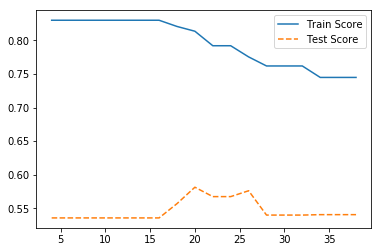

In [17]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

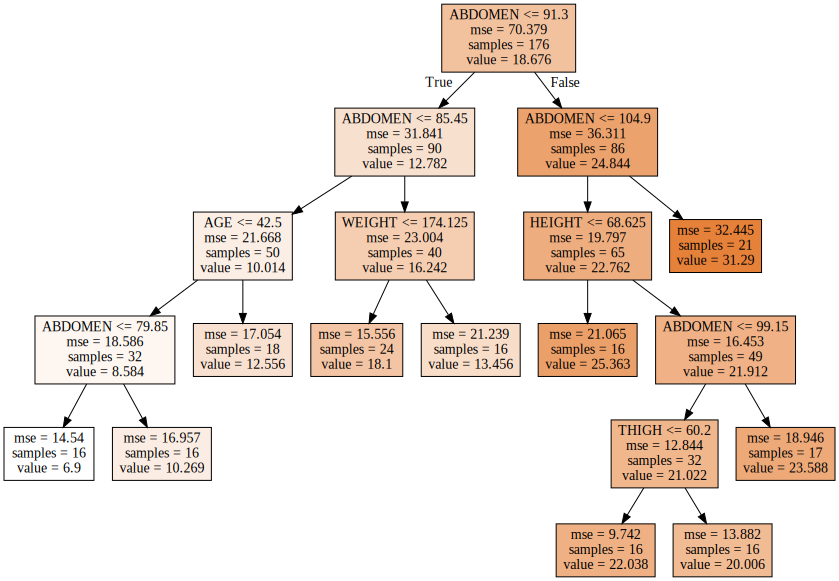

In [18]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split = 20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names = v_feature_name, impurity = True, filled = True)


with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

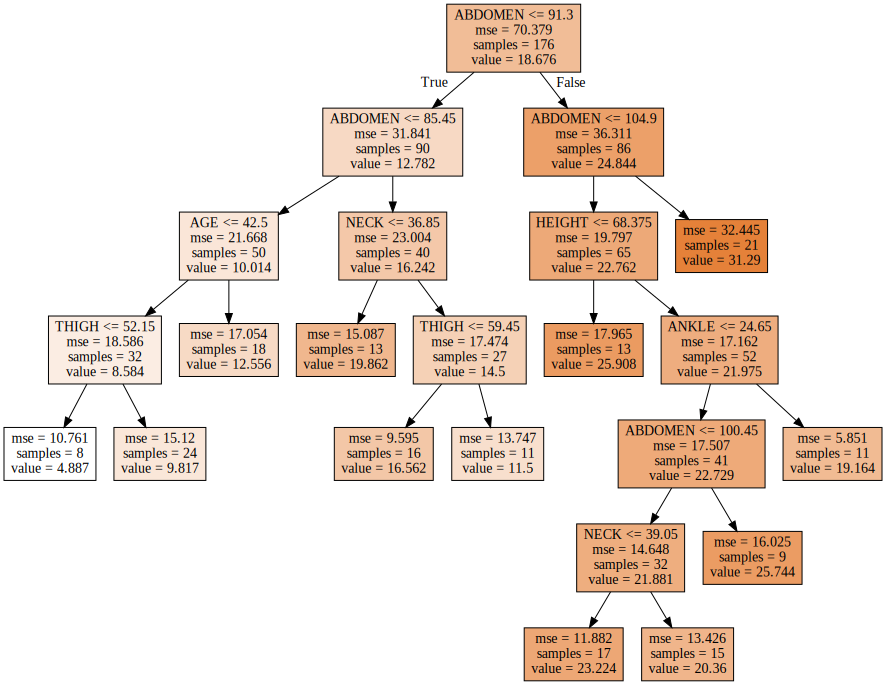

In [22]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split = 26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names = v_feature_name, impurity = True, filled = True)


with open("tree_split.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 깊이 변경에 따른 모델 성능

In [23]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,
                                min_samples_split=20, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["MinSamplesLeaf"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


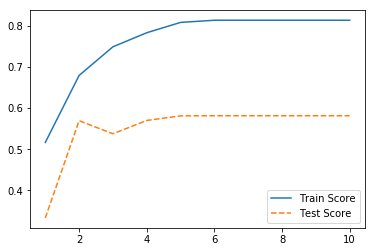

In [24]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

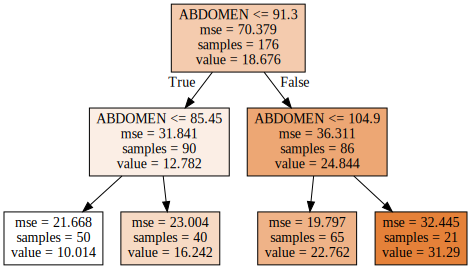

In [25]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split = 20, max_depth = 2)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

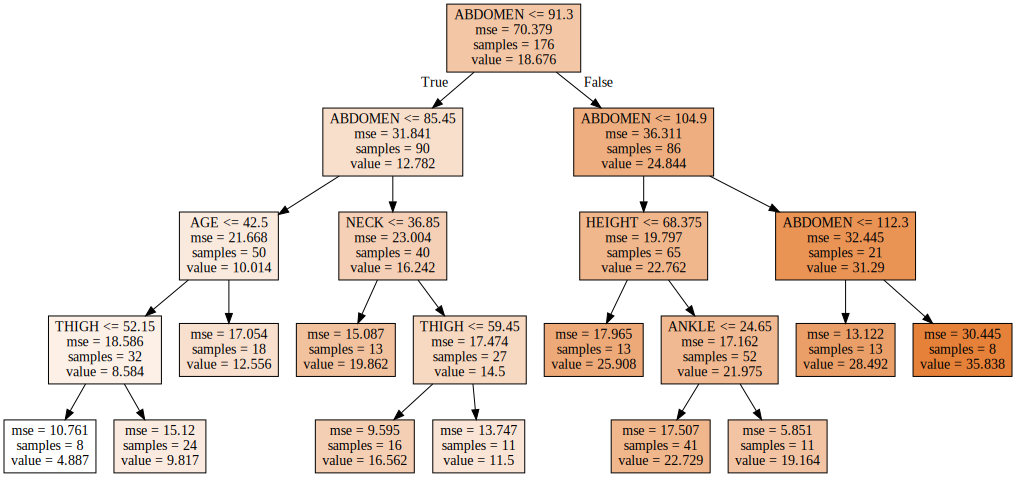

In [26]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split = 20, max_depth = 4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [27]:
tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split = 20, max_depth = 4, random_state = 1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [28]:
tree_uncustomized = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split = 20, max_depth = 4, random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set:	0.783
Score on test set:	0.570


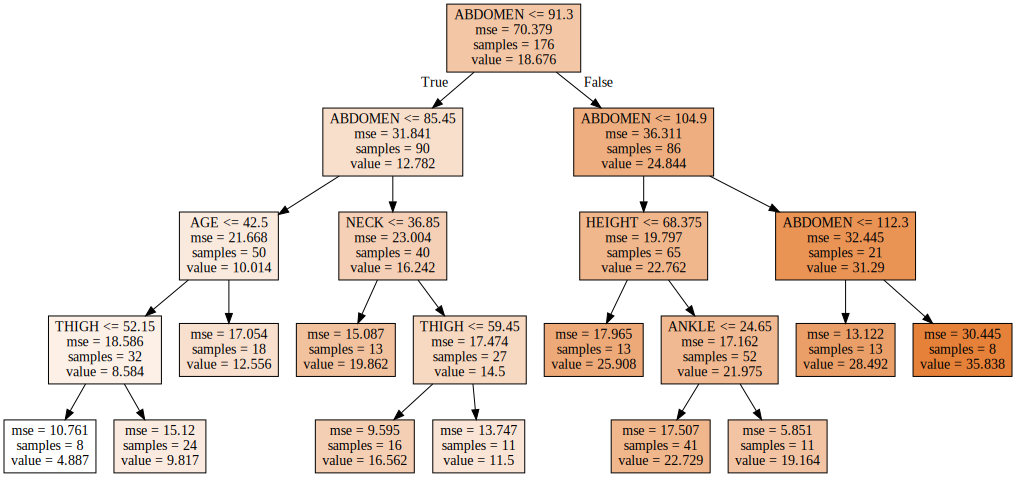

In [29]:
export_graphviz(tree_final, out_file = "tree_final.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [38]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, 'Variable')

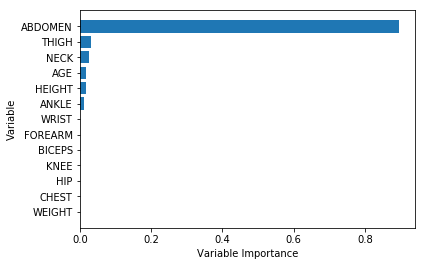

In [44]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

<BarContainer object of 3 artists>

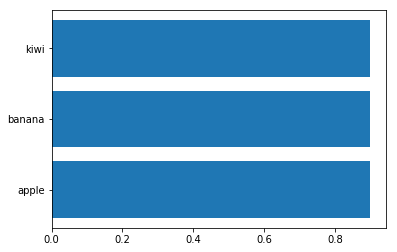

In [55]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = ["apple", "banana", "kiwi"], width = 0.9)

In [57]:
estimator = DecisionTreeRegressor()

param_grid = {"criterion":["mse", "friedman_mse", "mae"], "max_features":["auto", "sqrt", "log2"],
             "max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("Best estimator model \n{}".format(grid_dt.best_estimator_))
print("\nBest parameter: \n{}".format(grid_dt.best_params_))

print("\nBest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model 
DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Best parameter: 
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 4}

Best score: 
0.636


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:
tree_uncustomized = DecisionTreeRegressor(min_samples_leaf=17, min_samples_split = 4, max_depth = 4, random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set:	0.727
Score on test set:	0.530
